In [1]:
import os
import shutil

import numpy as np
from colorgram import extract
from matplotlib import pyplot as plt
from PIL import Image

from src.colorpalette import get_color_palette


In [2]:
def render_skin(skin):
    background = Image.new("RGBA", (68, 36), (255, 0, 0, 0))
    # front
    head = skin.crop((8, 8, 16, 16))
    background.paste(head, (4, 2, 12, 10))

    left_arm = skin.crop((36, 52, 40, 64))
    background.paste(left_arm, (12, 10, 16, 22))

    right_arm = skin.crop((44, 20, 48, 32))
    background.paste(right_arm, (0, 10, 4, 22))

    torso = skin.crop((20, 20, 28, 32))
    background.paste(torso, (4, 10, 12, 22))

    right_leg = skin.crop((4, 20, 8, 32))
    background.paste(right_leg, (4, 22, 8, 34))

    left_leg = skin.crop((20, 52, 24, 64))
    background.paste(left_leg, (8, 22, 12, 34))

    # back
    head = skin.crop((24, 8, 32, 16))
    background.paste(head, (24, 2, 32, 10))

    left_arm = skin.crop((44, 52, 48, 64))
    background.paste(left_arm, (32, 10, 36, 22))

    right_arm = skin.crop((52, 20, 56, 32))
    background.paste(right_arm, (20, 10, 24, 22))

    torso = skin.crop((32, 20, 40, 32))
    background.paste(torso, (24, 10, 32, 22))

    right_leg = skin.crop((12, 20, 16, 32))
    background.paste(right_leg, (24, 22, 28, 34))

    left_leg = skin.crop((28, 52, 32, 64))
    background.paste(left_leg, (28, 22, 32, 34))

    # left
    head = skin.crop((16, 8, 24, 16))
    background.paste(head, (42, 2, 50, 10))

    left_arm = skin.crop((40, 52, 44, 64))
    background.paste(left_arm, (44, 10, 48, 22))

    left_leg = skin.crop((24, 52, 28, 64))
    background.paste(left_leg, (44, 22, 48, 34))

    # right
    head = skin.crop((0, 8, 8, 16))
    background.paste(head, (60, 2, 68, 10))

    right_arm = skin.crop((40, 20, 44, 32))
    background.paste(right_arm, (62, 10, 66, 22))

    left_leg = skin.crop((0, 20, 4, 32))
    background.paste(left_leg, (62, 22, 66, 34))

    finished = background.resize((680, 360), resample=Image.NEAREST)

    return finished

In [3]:
dataroot = "dataset/Skins/images"
skin_names = os.listdir(dataroot)

Index: 522244


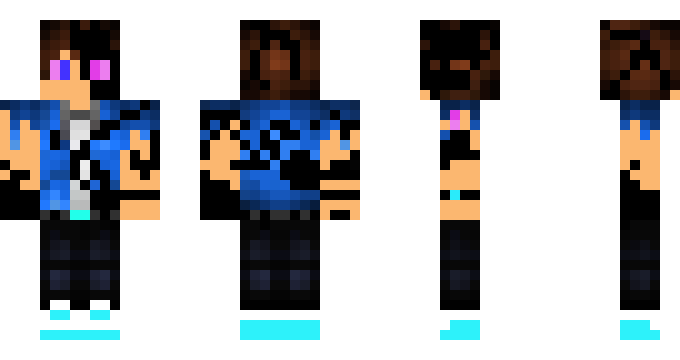

In [4]:
idx = np.random.randint(0, len(skin_names))
skin = Image.open(os.path.join(dataroot, skin_names[idx]))
print("Index:", idx)
render_skin(skin)

In [5]:
np.array(skin).shape

(64, 64, 4)

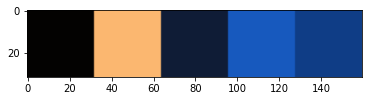

[82.0062860136197, 6.547930853850184, 4.662126767941331, 4.452592980618125, 2.3310633839706654]


In [6]:
colors = extract(skin, 5)
palette, propotions = get_color_palette(colors, 32, 32)
plt.imshow(palette)
plt.show()

print(propotions)

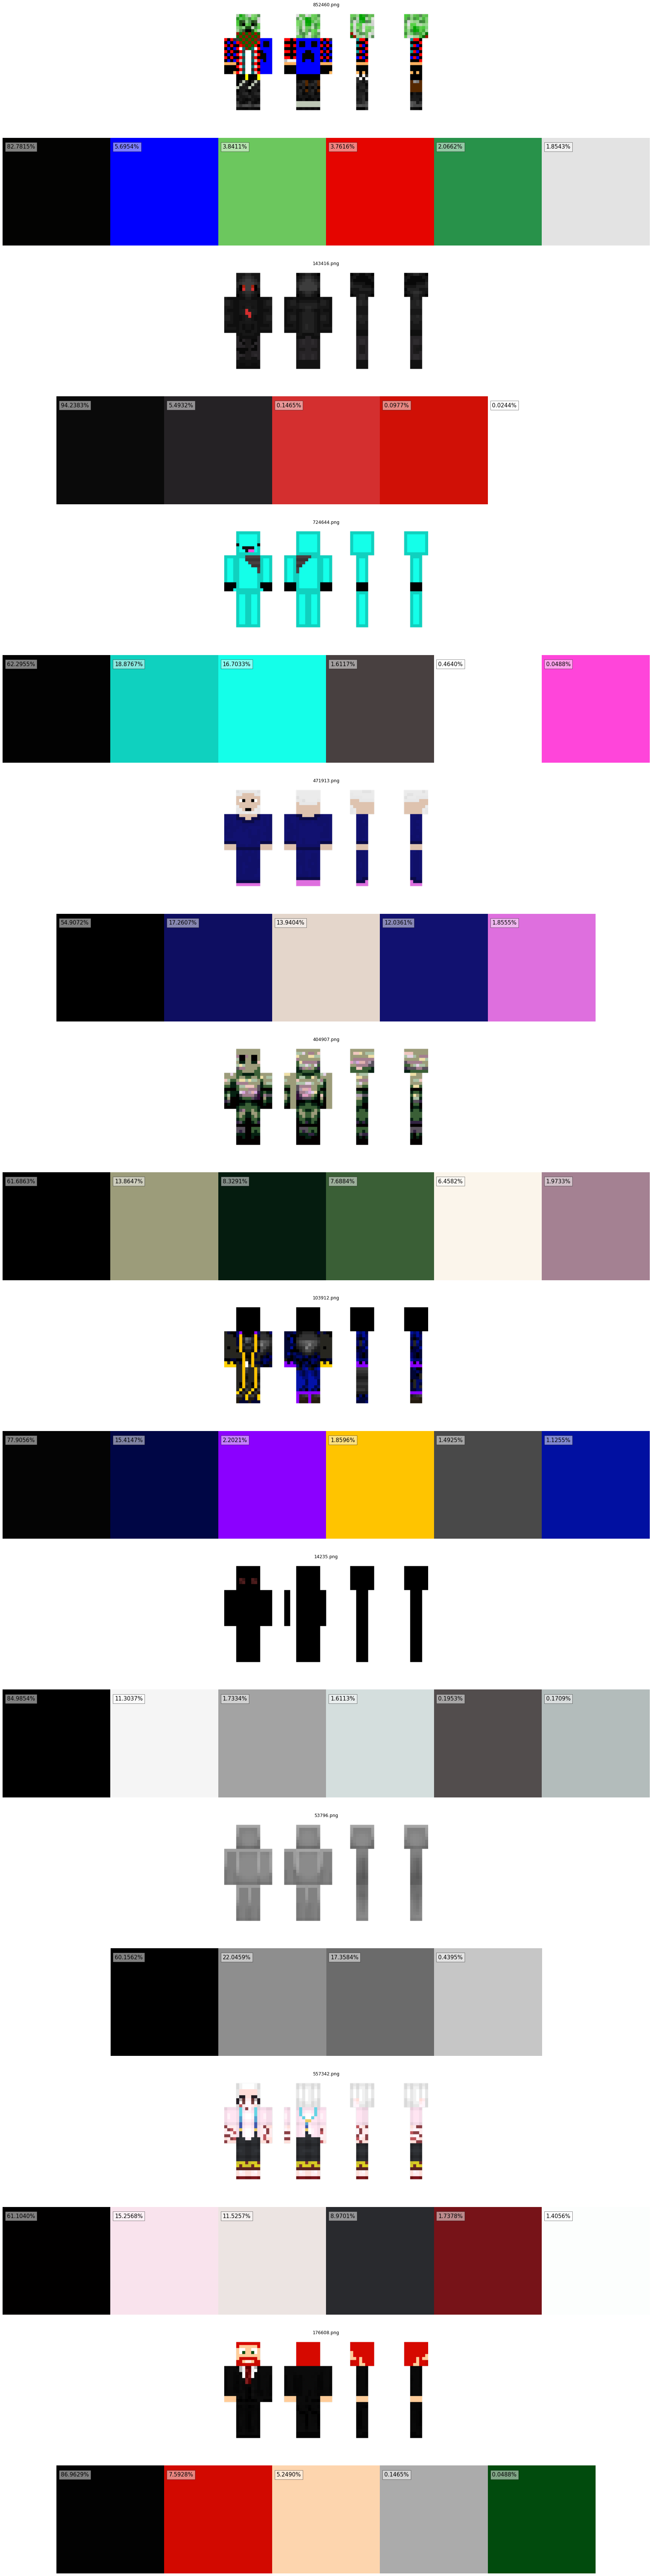

In [7]:
n = 10

fig, ax = plt.subplots(2 * n, 1, figsize=(2 * 16 * n, 128))

idxs = np.random.randint(0, len(skin_names), n)


for i, idx in zip(range(0, 2 * len(idxs), 2), idxs):
    skin_path = os.path.join(dataroot, skin_names[idx])
    skin = Image.open(skin_path)
    
    colors = extract(skin, 6)
    palette, prop = get_color_palette(colors, 10, 10)
    
    ax[i].imshow(render_skin(skin).resize((2 * 680, 2 * 360)))
    ax[i].axis("off")
    ax[i].set_title(skin_names[idx])
    
    ax[i + 1].axis("off")
    ax[i + 1].imshow(palette)
    
    for x, p in enumerate(prop):
        ax[i + 1].text((x - 0.01) * 10, 0.5, f"{p:0.4f}%", bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5}, fontsize=15)
        
    ax[i + 1].patch.set_edgecolor('black')  
    ax[i + 1].patch.set_linewidth('20')
    
plt.show()

In [8]:
# n = 5000
# idxs = np.random.randint(0, len(skin_names), n)
# for idx in idxs:
#     src = os.path.join(dataroot, skin_names[idx])
#     dst = os.path.join("dataset/Skins/test", skin_names[idx])
#     shutil.copyfile(src, dst)